# Daily Challenge : Advanced Data Analysis and Problem Solving with SciPy and NumPy

## Complex Data Transformation and Analysis

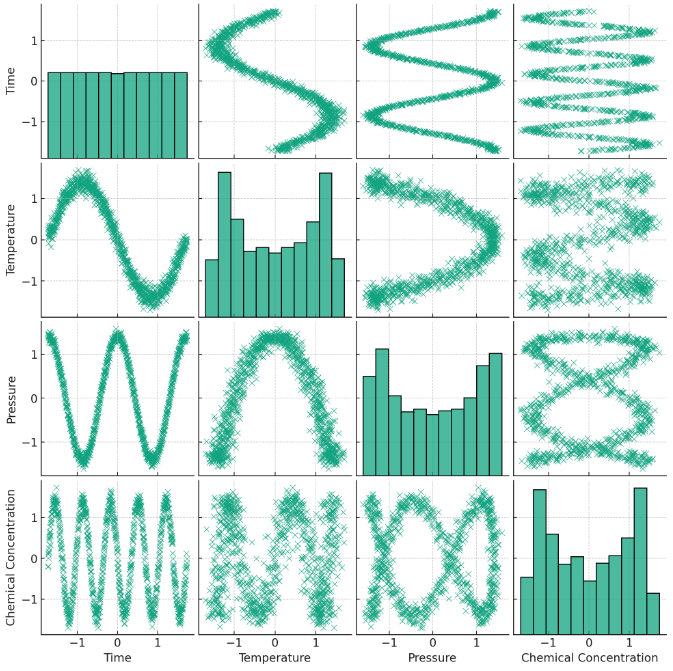

## Dataset creation code:

In [1]:
# data manipulation & stats
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

# ploting tools
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754
...,...,...,...,...
995,99.5996,20.080659,1033.072439,5.164919
996,99.6997,19.806464,1034.387284,4.630102
997,99.7998,19.984203,1033.152105,4.835813
998,99.8999,19.394747,1031.856516,4.694612


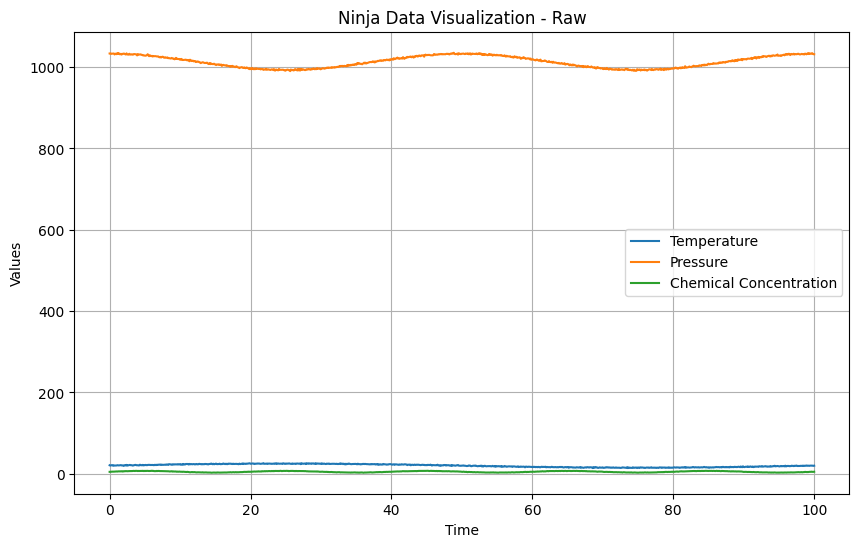

In [3]:
# prints dataset
display(ninja_data)

# visual inspection of the dataset
plt.figure(figsize=(10, 6))
plt.plot(ninja_data['Time'], ninja_data['Temperature'], label='Temperature')
plt.plot(ninja_data['Time'], ninja_data['Pressure'], label='Pressure')
plt.plot(ninja_data['Time'], ninja_data['Chemical Concentration'], label='Chemical Concentration')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Ninja Data Visualization - Raw')
plt.legend()
plt.grid(True)
plt.show()

The raw dataset fields are extremelly separated. We observe some ondulations, aall three fields are positive, and the pressure is ~3 magnitude orders above the others.

<Figure size 1000x800 with 0 Axes>

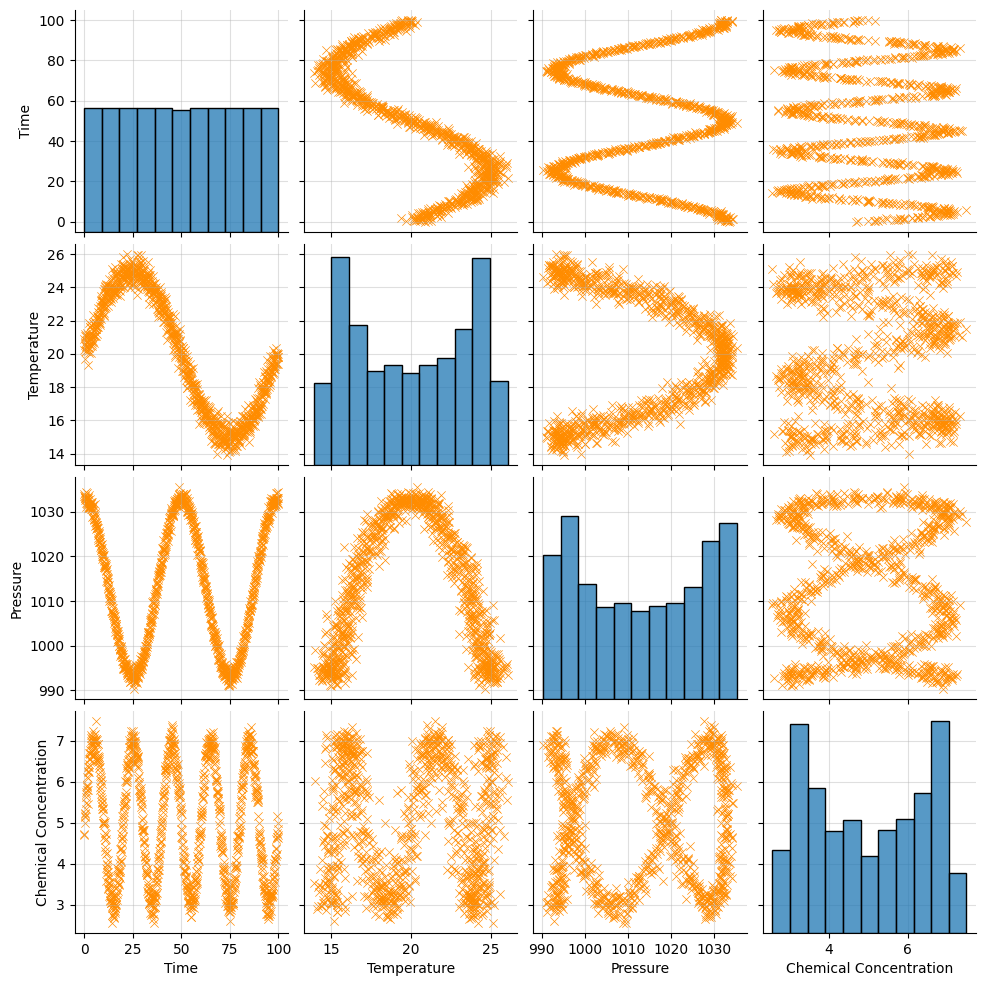

In [4]:
# standard scaled dataset pairplot
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(ninja_data, diag_kind='hist', kind='scatter', markers='x', plot_kws={'color':'darkorange'})
# plt.suptitle('Standard Scaled Dataset Pairplot', y=1.02)

# Loop through each Axes in the pairplot to add a grid
for ax in pair_plot.axes.flatten():
    ax.grid(True, alpha=0.4)  # Set grid visibility and transparency

plt.show()

**Pair Plot observations**:
- Distributions (diagonal):

  -  Temperature, Pressure, and Chemical Concentration exhibit u-shape pattern in their histograms, which is typical from cyclical phenomena.
  -  Time shows a uniform distribution, showing equal intervals between measurements.

- Relationships (pairwise relationships):

  -  Temperature vs. Pressure: A parabolic pattern, suggests a non-linear quadratic relationship or a sinusoidal one.
  -  Temperature vs. Chemical Concentration: A repeating cyclical pattern indicates a periodic relationship.
  -  Temperature vs. Time: A sinusoidal-like curve suggests a time-dependent oscillatory behavior.
  -  Similar cyclical and oscillatory relationships are evident in other pairs like Pressure vs. Time and Chemical Concentration vs. Time.

The sinusoidal/cyclic patterns observed in all the pairs imply that the variables might be governed by periodic processes, likely influenced by Time.



## 1. Data Transformation


**Normalization**: Transform the data so that each variable has a mean of 0 and standard deviation of 1

For that task we need Standard Scaler:

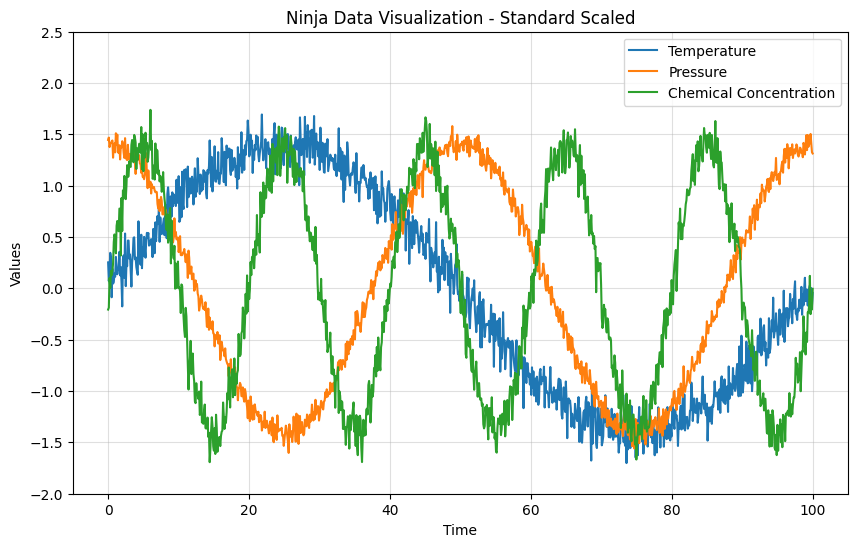

In [5]:
# start the scaler
scaler = StandardScaler()
# apply scaler
ninja_data_scaled = scaler.fit_transform(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']])
# transform to dataframe
ninja_data_scaled = pd.DataFrame(ninja_data_scaled, columns=['Temperature', 'Pressure', 'Chemical Concentration'])
# add time column
ninja_data_scaled['Time'] = ninja_data['Time']

# visualization of the scale
plt.figure(figsize=(10, 6))
plt.plot(ninja_data_scaled['Time'], ninja_data_scaled['Temperature'], label='Temperature')
plt.plot(ninja_data_scaled['Time'], ninja_data_scaled['Pressure'], label='Pressure')
plt.plot(ninja_data_scaled['Time'], ninja_data_scaled['Chemical Concentration'], label='Chemical Concentration')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Ninja Data Visualization - Standard Scaled')
plt.ylim(-2, 2.5)
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

After aplying Standard Scaler, all three fields have the same amplitude and are centered on x=0. After scaling we observe each field's noise.

**Logarithmic Scaling (Optional)**: Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.

To apply log transform we do it on the original dataset and not the transformed one -the logarithm doesnt beahve well for values lower or equal to 0.

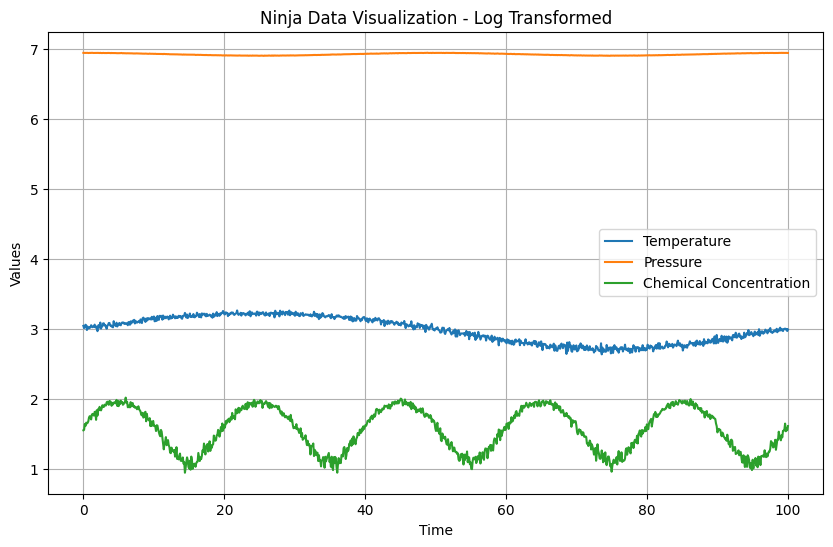

In [6]:
# log transform
cols_to_scale = ['Temperature', 'Pressure', 'Chemical Concentration']
ninja_data_log = ninja_data[cols_to_scale].apply(np.log)
ninja_data_log['Time'] = ninja_data['Time']

# visualize results
plt.figure(figsize=(10, 6))
plt.plot(ninja_data_log['Time'], ninja_data_log['Temperature'], label='Temperature')
plt.plot(ninja_data_log['Time'], ninja_data_log['Pressure'], label='Pressure')
plt.plot(ninja_data_log['Time'], ninja_data_log['Chemical Concentration'], label='Chemical Concentration')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Ninja Data Visualization - Log Transformed')
plt.legend()
plt.grid(True)
plt.show()

After applying log transform the scale is reduced and the relative separation between the fields is kept. So, depending on the study, we would have to reescale the fields -or not.
If some of the fields was an exponential grow, we would see a constant.

**Fourier Transformation**: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.

Tools: Explore np.fft.fft for Fourier transformation.

In [7]:
# fourier tranform
ninja_data_fft = ninja_data_scaled[cols_to_scale].apply(np.fft.fft)
ninja_data_fft['Time'] = ninja_data['Time']
print("The transformed dataframe columns have real and complex elements:\n")
display(ninja_data_fft)

The transformed dataframe columns have real and complex elements:



,Temperature,Pressure,Chemical Concentration,Time
0,1.426637e-13+0.000000e+ 00j,6.550316e-15+0.000000e+ 00j,-3.954614e-13+0.000000e+ 00j,0.0000
1,1.074739e+01-7.002981e+ 02j,2.260642e+00-9.911037e- 01j,-1.008313e+00-8.760928e- 01j,0.1001
2,4.241086e+00+1.211598e+ 00j,7.054554e+02+2.217084e+ 00j,1.817939e+00-6.426688e- 01j,0.2002
3,4.274556e-01-1.815277e+ 00j,-1.074363e+00+1.556754e- 01j,4.844332e-01-3.905610e+ 00j,0.3003
4,2.048151e+00+4.235381e+ 00j,-1.368763e+00+2.430997e+ 00j,-8.869240e-01-7.801102e+ 00j,0.4004
...,...,...,...,...
995,-1.288604e+00-2.733332e+ 00j,-1.841845e-01-2.424197e+ 00j,9.909959e+00+7.007198e+ 02j,99.5996
996,2.048151e+00-4.235381e+ 00j,-1.368763e+00-2.430997e+ 00j,-8.869240e-01+7.801102e+ 00j,99.6997
997,4.274556e-01+1.815277e+ 00j,-1.074363e+00-1.556754e- 01j,4.844332e-01+3.905610e+ 00j,99.7998
998,4.241086e+00-1.211598e+ 00j,7.054554e+02-2.217084e+ 00j,1.817939e+00+6.426688e- 01j,99.8999


## Max frequency of Temperature: 9.990e-03 Hz
## Max frequency of Pressure: 1.998e-02 Hz
## Max frequency of Chemical Concentration: 4.995e-02 Hz


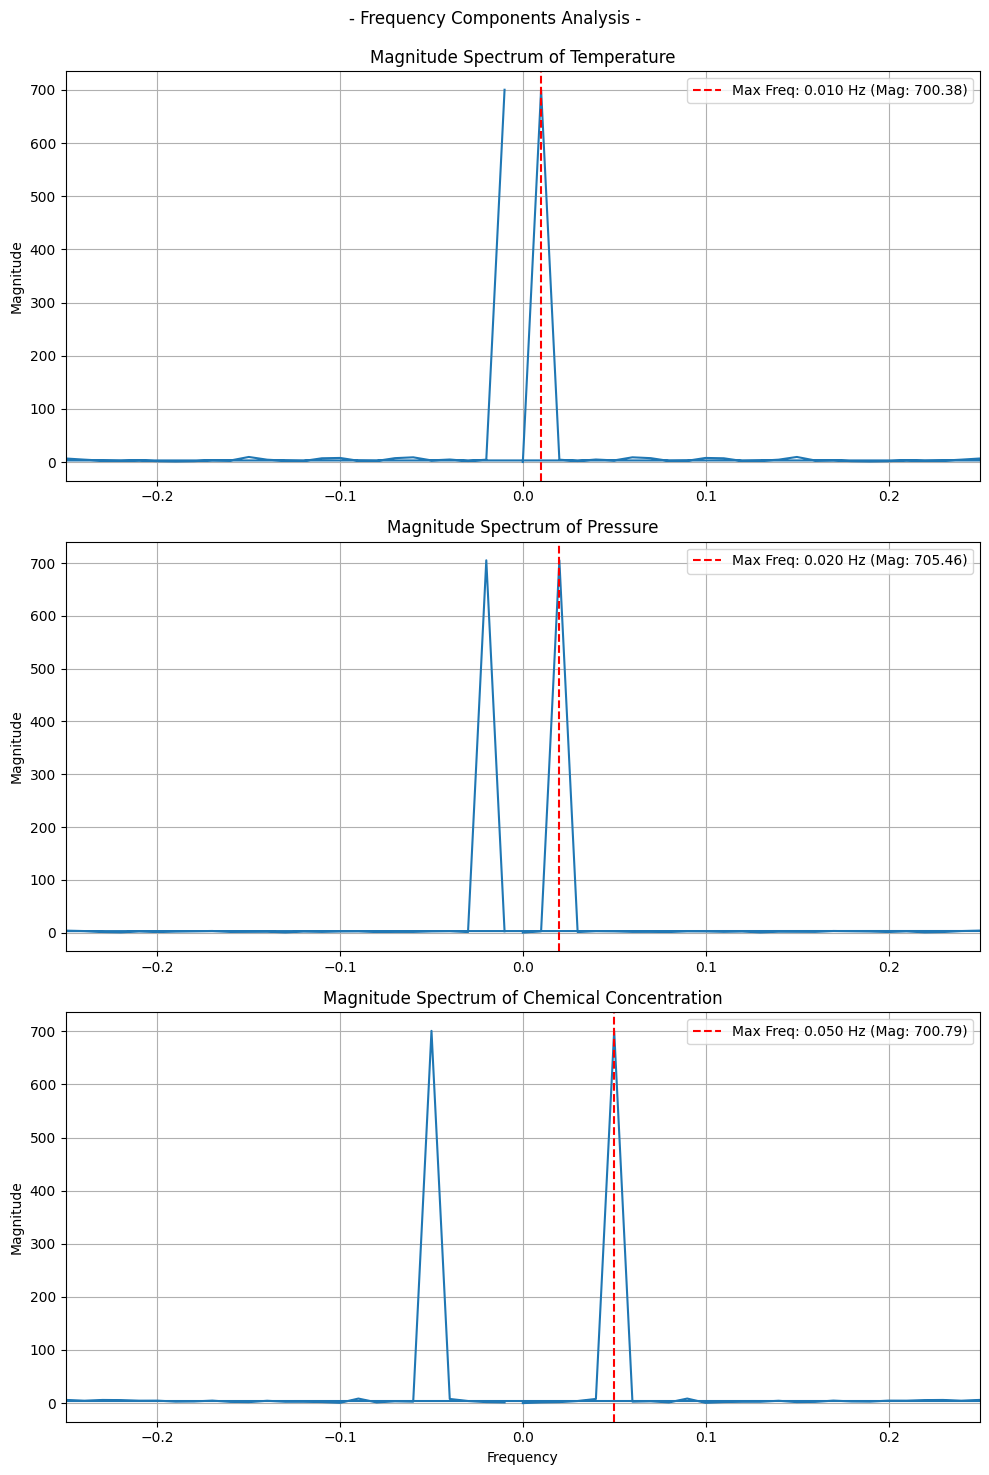

In [8]:
# calculate thr frequencies
N = len(ninja_data_fft)
T = (ninja_data_fft['Time'].max() - ninja_data_fft['Time'].min()) / (N - 1) # period
freq = np.fft.fftfreq(N, T) # frequency

# plot the magnitude spectrum for each col
cols_to_plot = cols_to_scale

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("- Frequency Components Analysis -\n")

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    ax.plot(freq, np.abs(ninja_data_fft[col]))
    # ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')
    ax.set_title(f'Magnitude Spectrum of {col}')
    ax.set_xlim(-.25, .25)
    ax.grid(True)

    # find the maximum frequency
    max_freq_index = np.argmax(np.abs(ninja_data_fft[col]))
    max_freq = abs(freq[max_freq_index])
    max_magnitude = np.abs(ninja_data_fft[col][max_freq_index])
    ax.axvline(x=max_freq, color='r',
               linestyle='--',
               label=f'Max Freq: {max_freq:.3f} Hz (Mag: {max_magnitude:.2f})')
    ax.legend()
    print(f"## Max frequency of {col}: {abs(max_freq):.3e} Hz")

    # # annotate the maximum frequency point
    # ax.annotate(f'Max Freq: {max_freq:.2f}\nMag: {max_magnitude:.2f}',
    #             xy=(max_freq, max_magnitude),
    #             xytext=(max_freq, max_magnitude),
    #             arrowprops=dict(facecolor='black', shrink=0.05)),

axes[-1].set_xlabel('Frequency')
plt.tight_layout()
plt.show()

### Interpretation:

* A peak at frequency f means our original data has a strong sinusoidal component that repeats f times per unit of our time measurement.
* The height of the peak (magnitude) indicates the strength or amplitude of that frequency component.

* **Side Note on Symmetry**: We can notice that the plot is symmetrical around the y-axis. This is because the FFT of real data produces a complex conjugate symmetric output. **The negative frequencies are a mirror image of the positive frequencies and don't provide additional information for real-valued input data.**

Analysis of the Fourier transform plots reveals distinct dominant (unique) frequencies for each measured parameter:

  *  Temperature: exhibits a primary frequency component at 0.01 Hz
  *  Pressure: shows a main frequency peak at 0.02 Hz
  *  Chemical concentration: demonstrates a predominant frequency of 0.05 Hz

These frequencies represent the most significant periodic components in each respective time series, indicating characteristic oscillations or cycles in the original data (as they were generated).

## 2. Statistical Analysis:

* Goal: Extract statistical insights from the data.
* Steps and Hints:
  - Descriptive Statistics: Use pandas describe() function to get an overview of the data.
  - Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.
  - Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.
  - Tools: Explore scipy.stats for advanced statistical functions.


In [9]:
display(ninja_data.describe())

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


`Time`: Ranges 0 to 100, evenly distributed

`Temperature`: Ranges from 13.9 to 26.0, with a mean of ~20.0. The std is 3.57 although, due the oscliations std cant be considered as an error in this case

`Pressure`: Ranges from 990 to 1035, a mean of 1013 and a std of 14

`Chemical Concentration`: Ranges from 2.56 to 7.48, mean of 4.99 and std of 1.44

In all cases the median (50%) is close to the mean which suggests a symmetric distribution

Overall, the data suggests a controlled environment or experiment with moderate variations in temperature, pressure, and chemical concentration over the observed time period.

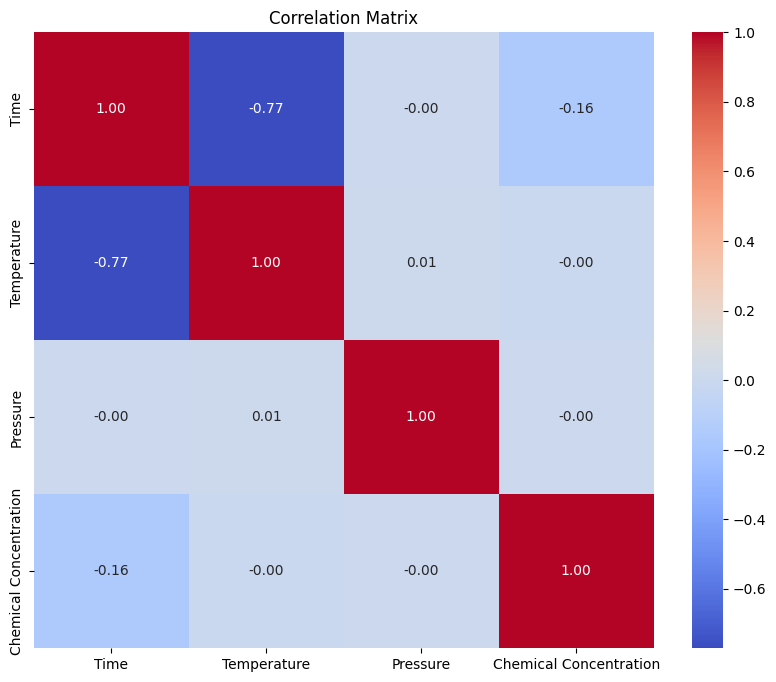

In [10]:
# calculate correlation matrix (PEARSON!!!!)
# NOTICE!!: it works for linear correlations!!!
correlation_matrix = ninja_data.corr()

# release the kraken
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we observe a strong negative correlation of 0.77 between `Time` and `Temperature`. This indicates that as time progresses, there is a significant tendency for temperature to decrease.

There is a very weak negative correlation of 0.16 between `Time` and `Chemical Concentration`. While there is a slight tendency for the chemical concentration to decrease over time, the relationship is not strong.

No significant correlations are noted among the other variables (`Temperature`, `Pressure`, and `Chemical Concentration`), implying these variables may be largely independent of each other.

We proceed to compare the mean temperature and chemical concentration for the two halves of the experiment. We hypothesize that the means are different; the null hypothesis is that the means do not change over time. The threshold level is set at p = 0.05.

In [11]:
# divide time range
time_range_1 = ninja_data['Time'] < ninja_data['Time'].mean() # first half
time_range_2 = ninja_data['Time'] >= ninja_data['Time'].mean() # second half

# ttest_ind
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.
# This test assumes that the populations have identical variances by default.
t_stat_temp, p_value_temp = stats.ttest_ind(ninja_data[time_range_1]['Temperature'], ninja_data[time_range_2]['Temperature'])
t_stat_chem, p_value_chem = stats.ttest_ind(ninja_data[time_range_1]['Chemical Concentration'], ninja_data[time_range_2]['Chemical Concentration'])

print(f"Temperature: t-statistic = {t_stat_temp:.3f}, p-value = {p_value_temp:.3e}")
print(f"Chemical Concentration: t-statistic = {t_stat_chem:.3f}, p-value = {p_value_chem:.3e}")

Temperature: t-statistic = 62.590, p-value = 0.000e+00
Chemical Concentration: t-statistic = 5.788, p-value = 9.528e-09


In both cases, the p-values are significantly less than 0, leading us to reject the null hypothesis. We can conclude that both mean values change from one half to the other within the specified time range.

Even though we observed a very weak correlation between `Chemical Concentration` and `Time`, the t-test indicates that the mean chemical concentration has changed over the course of the experiment.

It's worth noting that the correlation matrix performs Pearson's correlation between the fields, which is suitable for linear correlations. Given that our variables are periodic, a more comprehensive correlation analysis would require examination over time intervals comparable to the period T. Nonetheless, despite the periodic behavior, a general tendency of change has been observed along the two halves of the experiment.

## 3. Data Visualization:

  *  Goal: Create visual representations of your findings.
  *  Steps and Hints:
      -  Heatmaps: Use heatmaps to visualize correlation matrices. This can be done with seaborn.
      -  Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.
      -  Fourier Transform Visualizations: Plot the amplitude vs. frequency graphs for the Fourier transformed data.
      -  Tools: Utilize matplotlib and seaborn for creating plots.


## 4. Interpretation:

  -  Goal: Write a brief report interpreting the results of your analyses.
  -  Steps and Hints:
      -  Discuss Findings: Interpret the results of your statistical analyses and visualizations. Consider real-world implications or applications of your findings.
      -  Relate to Real-World: Think about how these insights can be applied in practical scenarios or how they align with theoretical knowledge.
      -  Reflect on the Process: Comment on what the data transformations and analyses reveal about the nature of the dataset.


We studied a dataset that measured variations of temperature, pressure and chemical concentration along time. The sinusoidal/cyclic patterns observed in all the pairs imply that the variables might be governed by periodic processes, likely influenced by time.

In the dataset we observe that temperature, pressure, and chemical concentration exhibit u-shape patterns in their histograms, which is typical from cyclical phenomena.
Time shows a uniform distribution, showing equal intervals between measurements.

The dataset field scales are many magnitude order apart from each other. Standard scaler and log transform improved the scale considerably for comparison between the fiels. Although standard scaler proved to be better for allowing comparative behavior analysis, since all fields vary into the same limits.

Due the periodic behaviour of the variables, a fourier transformation was applied on the dataset. All three of the studied variables showed distinctive peaks for the following frequencies in the Fourier space:

  *  Temperature: exhibits a primary frequency component at 0.01 Hz
  *  Pressure: shows a main frequency peak at 0.02 Hz
  *  Chemical concentration: demonstrates a predominant frequency of 0.05 Hz

The correlation matrix showed a strong negative correlation of 0.77 between time and temperature. It also showed a very weak negative correlation of 0.16 between time and chemical concentration.

A t-test was performed evaluating the mean value of temperature along time; and another also for the temporal variation of the mean chemical concentration. The test discarded the null hypothesis for both cases.

Overall, the data suggests a controlled environment or experiment with moderate periodic sinusoidal-like variations in temperature, pressure, and chemical concentration over the observed time period.